# IBM HR Attrition: Predictive Modeling

In this notebook, I will be using the IBM HR Analytics Employee Attrition & Performance dataset from Kaggle to analyze what factors caused an employee to leave the company. I will also use it to build a classification model to predict whether an employee will leave.

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

import xgboost as xgb

## Load Data

In [154]:
df = pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [104]:
pd.options.display.max_columns = 35 #35 columns in data set
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Investigate Distributions

#### Look at target balance

Text(0.5, 1.0, 'Employee Attrition')

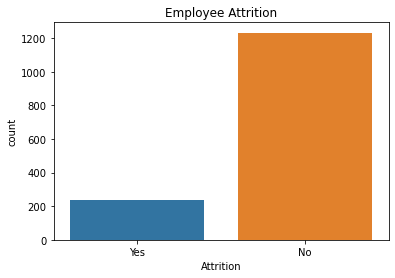

In [7]:
sns.countplot(df['Attrition'])
plt.title("Employee Attrition")

Here we can see we are dealing with an imbalanced data set.

#### Check out KDE plots

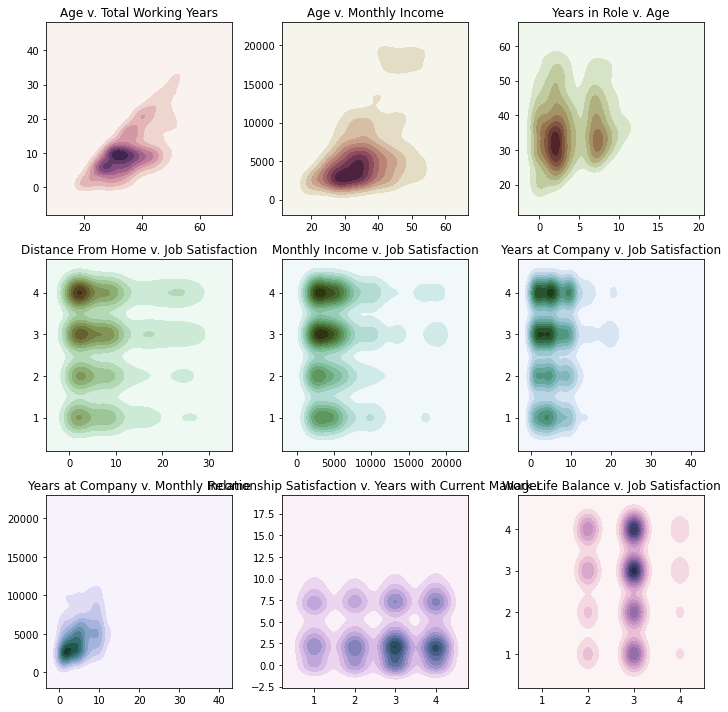

In [10]:
f, axes = plt.subplots(3, 3, figsize=(10,10), sharex=False, sharey=False)

# define color map
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='Age v. Total Working Years')

cmap = sns.cubehelix_palette(start=0.33333, light=1, as_cmap=True)
x = df['Age'].values
y = df['MonthlyIncome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(title='Age v. Monthly Income')

cmap = sns.cubehelix_palette(start=0.66667, light=1, as_cmap=True)
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title='Years in Role v. Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = df['DistanceFromHome'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(title='Distance From Home v. Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.33333, light=1, as_cmap=True)
x = df['MonthlyIncome'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(title='Monthly Income v. Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.66667, light=1, as_cmap=True)
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(title='Years at Company v. Job Satisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = df['YearsAtCompany'].values
y = df['MonthlyIncome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set(title='Years at Company v. Monthly Income')

cmap = sns.cubehelix_palette(start=2.33333, light=1, as_cmap=True)
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set(title='Relationship Satisfaction v. Years with Current Manager')

cmap = sns.cubehelix_palette(start=2.66667, light=1, as_cmap=True)
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set(title='Work Life Balance v. Job Satisfaction')

f.tight_layout()

## Feature Engineering

There are a few features that can be created that I believe could be helpful in predicting if an employee will leave the company.

**New Features**
- LonDis (Long Distance): An employee comutes 10 miles or more
- ColDeg (College Degree): An employee has obtained a college degree
- LowIncLowJS (Low Income, Low Job Satisfaction): An employee is being paid less than the median for his role and has job satisfaction of 1
- Loyalty: Total working years divided by number companies worked for (higher number means more loyal)
- CompLoyalty (Loyalty to this Company): Total years at company divided by total number of working years (best is 1)

In [155]:
def LonDis(df):
    if df['DistanceFromHome'] >= 11:
        return 1
    else:
        return 0
df['LonDis'] = df.apply(lambda df:LonDis(df), axis=1)

def ColDeg(df):
    if df['Education'] >= 3:
        return 1
    else:
        return 0
df['ColDeg'] = df.apply(lambda df: ColDeg(df), axis=1)

# use the MedianIncRole column for comparisons in the LowIncLowJS function
df['MedianIncRole'] = df.groupby('JobRole')['MonthlyIncome'].transform(lambda x: x.median())

def LowIncLowJS(df):
    if df['JobSatisfaction'] == 1 and df['MonthlyIncome'] < df['MedianIncRole']:
        return 1
    else:
        return 0
df['LowIncLowJS'] = df.apply(lambda df: LowIncLowJS(df), axis=1)

# impute values for NumCompaniesWorked by using median based on TotalWorkingYears
df['NumCompaniesWorked'] = df.groupby('TotalWorkingYears')['NumCompaniesWorked'].transform(lambda x: x.replace(0, x.median()))
df['Loyalty'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']
df['CompLoyalty'] = df['YearsAtCompany'] / df['TotalWorkingYears']
df['CompLoyalty'] = df['CompLoyalty'].fillna(1)

# drop median inc role column
df.drop('MedianIncRole', axis=1, inplace=True)

In [156]:
# only one employee in data set worked 38 years and had missing value for NumCompaniesWorked
# setting loyalty to 19 (assuming worked at 2 companies)
df.loc[98, 'Loyalty'] = 19

### Plot New Features
Plotting new features since they weren't present when doing my EDA

In [157]:
def barplot(var_select, reverse=False):
    if reverse:
        crosstab_data = pd.crosstab(df['Attrition'], df[var_select])
        crosstab_data_pcts = crosstab_data.div(crosstab_data.sum(1).astype(float),axis=0)*100
        crosstab_data_pcts = crosstab_data_pcts.stack().reset_index().rename(columns={0:'Percent'})
        sns.barplot(x='Attrition', y='Percent', hue=var_select, data=crosstab_data_pcts, palette='Blues')
    else:
        crosstab_data = pd.crosstab(df[var_select], df['Attrition']) 
        crosstab_data_pcts = crosstab_data.div(crosstab_data.sum(1).astype(float),axis=0)*100
        crosstab_data_pcts = crosstab_data_pcts.stack().reset_index().rename(columns={0:'Percent'})
        sns.barplot(x=var_select, y='Percent', hue='Attrition', data=crosstab_data_pcts, palette='Blues')
        
    plt.title(str("Attrition by "+var_select))
    plt.show()

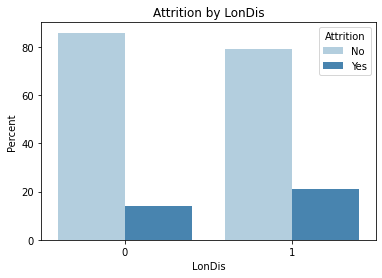

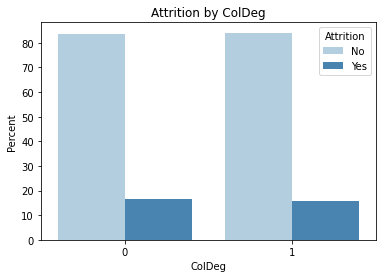

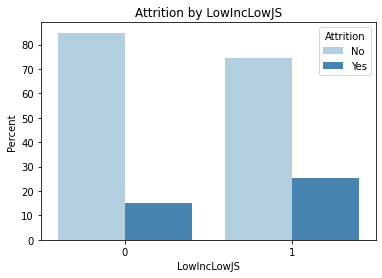

In [158]:
barplot('LonDis')
barplot('ColDeg')
barplot('LowIncLowJS')

### Drop Features
Dropping features that are unnecessary, redundant, or useless

In [159]:
df = df.drop(columns=[
    'Education',
    'EmployeeCount',
    'DistanceFromHome'
])

df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LonDis,ColDeg,LowIncLowJS,Loyalty,CompLoyalty
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,...,11,3,1,80,0,8,0,1,6,4,0,5,0,0,0,1.0,0.75


### Encoding and Scaling of Features

In [160]:
# pull out and save ID and target (Attrition)
ID_col = ['EmployeeNumber']
target_col = ['Attrition']

# separate columns by type (categorical, binary, numerical)
cat_cols = df.nunique()[df.nunique() < 10].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
binary_cols = df.nunique()[df.nunique() == 2].keys().tolist()
num_cols = [x for x in df.columns if x not in cat_cols + target_col + ID_col]
multi_cols = [i for i in cat_cols if i not in binary_cols] # separates out binary columns

In [161]:
#label encode binary
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [162]:
#turn multi_cols into dummy variables
df = pd.get_dummies(data=df, columns=multi_cols)

#scale data using standard scaler
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# drop unscaled values and merge
df_original = df.copy()
df = df.drop(columns=num_cols, axis=1)
df = df.merge(scaled, left_index=True, right_index=True, how='left')
df.drop('EmployeeNumber', axis=1)

,Attrition,Gender,OverTime,PerformanceRating,LonDis,ColDeg,LowIncLowJS,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Loyalty,CompLoyalty
0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0.446350,0.742527,1.383138,-0.108350,0.726020,2.173270,-1.150554,-0.421642,-0.164613,-0.063296,-0.679146,0.245834,-0.902070,0.199017
1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1.322365,-1.297775,-0.240677,-0.291719,1.488876,-0.815031,2.129306,-0.164511,0.488508,0.764998,-0.368715,0.806541,0.810801,0.971084
2,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0.008343,1.414363,1.284725,-0.937654,-1.674841,1.319470,-0.057267,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935,-0.870350,-2.117184
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,-0.429664,1.461466,-0.486709,-0.763634,1.243211,-0.815031,-1.150554,-0.421642,0.161947,0.764998,0.252146,-1.155935,0.430163,0.971084
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,-1.086676,-0.524295,-1.274014,-0.644858,0.325900,2.600170,-0.877232,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227,-0.965510,-1.087761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,-0.101159,0.202082,-1.224807,-0.835451,-0.284329,0.465670,0.489376,0.735447,-0.327893,-0.615492,-0.679146,-0.314873,-0.283533,-1.208870
1466,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0.227347,-0.469754,-1.175601,0.741140,1.004010,0.465670,-0.057267,-0.293077,-0.001333,0.764998,-0.368715,0.806541,-0.664171,0.284802
1467,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,-1.086676,-1.605183,1.038693,-0.076690,-1.284418,-0.815031,1.309341,-0.678774,-0.164613,-0.615492,-0.679146,-0.314873,0.049525,0.971084
1468,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1.322365,0.546677,-0.142264,-0.236474,-0.150393,-0.388131,-0.330589,0.735447,0.325228,0.488900,-0.679146,1.086895,0.525322,-0.482219


### Remove Collinear Features

In [163]:
# collinearity threshold
thresh = 0.8

# corr matrix in abs val terms
corr_matrix = df.corr().abs()

# use only upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# select the columns that are above threshold
drop_collin = [column for column in upper.columns if any(upper[column] > thresh)]

# drop columns
df = df.drop(columns = drop_collin)

print("Columns dropped:")
drop_collin

Columns dropped:


['Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive']

### Prepare the Dataset

##### Define X and y

In [175]:
# y = np.array(df.Attrition.tolist())
y = df['Attrition'].values
X = df.drop('Attrition', 1).values

##### Split data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### RandomizeSearchCV for Optimal Hyperparameters

In [181]:
# define xgb classifier
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

# define parameter grid
params = {
    'n_estimators' : [100, 200, 500, 750],
    'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
    'min_child_weight': [1, 5, 7, 10],
    'gamma': [0.1, 0.5, 1, 1.5, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 10, 12]
}

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=800,
                                   scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

random_search.fit(X, y)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 11.8min finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(n_jobs=-1), n_iter=800,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [182]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=1.0, gamma=1, learning_rate=0.02, max_depth=12,
              min_child_weight=5, n_estimators=750, n_jobs=-1, subsample=0.6)

### Use Best Estimator

In [184]:
xgb_clf = xgb.XGBClassifier(colsample_bytree=1.0, gamma=1, learning_rate=0.02, max_depth=12,
              min_child_weight=5, n_estimators=750, n_jobs=-1, subsample=0.6)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)
y_score = xgb_clf.predict_proba(X_test)[:,1]

In [191]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[311,   9],
       [ 35,  13]], dtype=int64)

In [262]:
# other metrics
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
fp = conf_matrix[0,1]
tn = conf_matrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]], columns=('Accuracy','Precision','Recall','F1_score'))
metrics.T

,0
Accuracy,0.880435
Precision,0.590909
Recall,0.270833
F1_score,0.371429


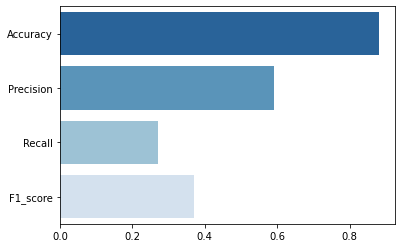

In [269]:
sns.barplot(data=metrics, orient='h', palette='Blues_r')
plt.show()

In [254]:
#feature importance plot TOP 20
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': list(df.drop('Attrition', 1)), 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('XGBoost Feature Importance - Top 20',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h', palette='Blues_r')
    plt.show()

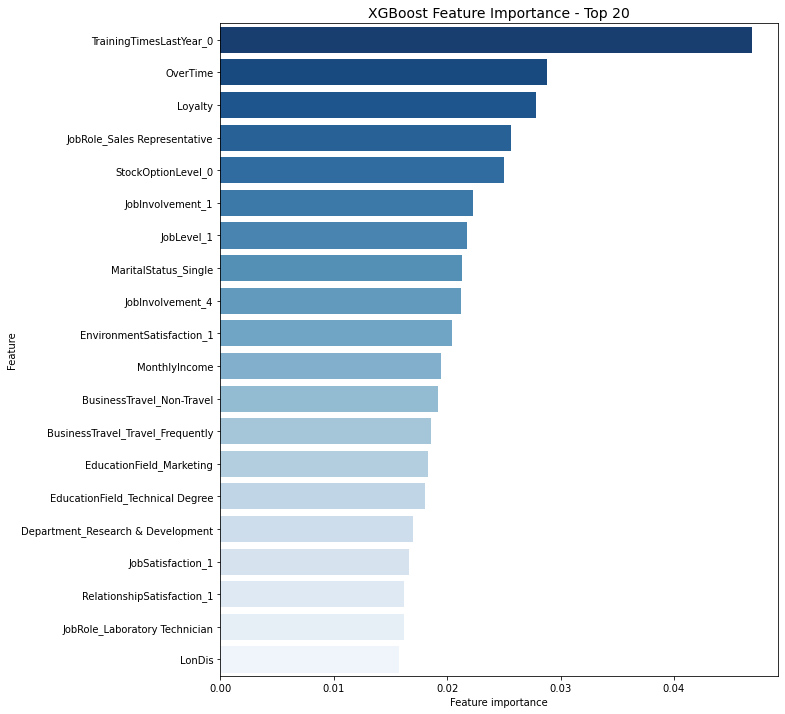

In [255]:
plot_feature_importance(xgb_clf)

### XGB Conclusion

It is my belief that with this analysis the company would try to tweak an employee's circumstances so that s/he does not leave the company. With this logic, it is most important to correctly identify if an employee is going to leave while minimizing false negatives (this way you can focus efforts on fixing the employee's circumstances so you don't lose talent). Therefore, the metric most important to us is Recall. F1 Score is also an important metric since we are dealing with an imbalanced data set.

**Performance**\
Recall = 0.27\
F1 Score = 0.37

Both scores are relatively low with the XGB model implying we have poor predictive power when determining if an employee will leave the company or not.